In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

from xgboost import XGBClassifier
from sklearn import svm

from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('../../../high_diamond_ranked_10min.csv')

In [ ]:
df

In [ ]:
df.isnull().sum().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.columns

**Feature Engineering**

In [ ]:
df.loc[df['blueGoldDiff'] ==0] = 1
df.loc[df['redGoldDiff'] ==0] = 1

In [3]:
df['blueTotalWardens'] = round((df['blueWardsPlaced'] + df['blueWardsDestroyed'] + df['blueAssists']), 2)
df['redTotalWardens'] = round((df['redWardsPlaced'] + df['redWardsDestroyed'] + df['redAssists']), 2)

In [ ]:
df['redGoldExperience'] = round((df['redGoldDiff'] + df['redGoldPerMin']) / df['redTotalExperience'], 2)
df['blueGoldExperience'] = round((df['blueGoldDiff'] + df['blueGoldPerMin']) / df['blueTotalExperience'], 2)

In [ ]:
df['redGolds'] = round((df['redGoldDiff'] * df['redGoldPerMin']), 2)
df['blueGolds'] = round((df['blueGoldDiff'] * df['blueGoldPerMin']), 2)

In [4]:
df.loc[df['redDeaths'] ==0] = 1

In [5]:
df.loc[df['blueDeaths'] ==0] =1

In [6]:
df['red_kda'] = round((df['redKills'] + df['redAssists']) / df['redDeaths'], 2)
df.fillna(0, inplace=True)

df['blue_kda'] = round((df['blueKills'] + df['blueAssists']) / df['blueDeaths'], 2)

In [7]:
df['redDeaths'].describe()

count    9879.000000
mean        6.155279
std         3.021717
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        22.000000
Name: redDeaths, dtype: float64

In [8]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueTotalWardens,redTotalWardens,red_kda,blue_kda
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.438589e+09,0.505517,21.988562,2.803826,0.511185,6.155279,6.112866,6.613422,0.556129,0.370888,...,214.215305,50.578702,-11.535884,33.244762,21.433829,1628.082174,31.378480,31.373520,2.855013,2.837323
std,5.231931e+08,0.499995,18.065805,2.177621,0.499900,3.021717,2.940683,4.070927,0.623056,0.483067,...,33.169790,11.545874,2412.341933,1890.344004,3.238635,241.197930,19.045182,19.400615,2.922848,2.854489
min,1.000000e+00,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,-11467.000000,-8348.000000,1.000000,1.000000,1.000000,1.000000,0.080000,0.070000
25%,4.481379e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,203.000000,44.000000,-1549.000000,-1179.000000,20.300000,1541.000000,22.000000,22.000000,1.245000,1.220000
50%,4.510667e+09,1.000000,16.000000,2.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,218.000000,51.000000,1.000000,3.000000,21.800000,1636.000000,26.000000,26.000000,2.000000,2.000000
75%,4.521659e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,232.000000,57.000000,1545.000000,1261.000000,23.200000,1741.000000,33.000000,33.000000,3.400000,3.400000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000,266.000000,287.000000,35.000000,40.000000


In [9]:
X = df.drop(columns=['blueWins', 'gameId'])
y = df['blueWins']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns= X_test.columns)
X_test_scaled_df

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueTotalWardens,redTotalWardens,red_kda,blue_kda
0,0.052209,0.08,0.0,0.142857,0.333333,0.103448,1.0,1.0,1.0,0.0,...,0.822064,0.725275,0.729112,0.590465,0.816176,0.865461,0.067925,0.332168,0.090779,0.020285
1,0.056225,0.04,1.0,0.428571,0.190476,0.344828,0.0,0.0,0.0,0.0,...,0.718861,0.472527,0.411087,0.435390,0.709559,0.685107,0.094340,0.146853,0.026346,0.098422
2,0.036145,0.20,0.0,0.714286,0.571429,0.551724,1.0,1.0,1.0,0.0,...,0.676157,0.560440,0.489797,0.431015,0.665441,0.830957,0.113208,0.087413,0.038946,0.059855
3,0.321285,0.20,0.0,0.476190,0.476190,0.482759,0.0,0.0,0.0,0.0,...,0.708185,0.252747,0.449657,0.417263,0.698529,0.768506,0.373585,0.097902,0.054983,0.055096
4,0.068273,0.08,0.0,0.333333,0.571429,0.172414,0.0,0.0,0.0,0.0,...,0.790036,0.406593,0.651343,0.609558,0.783088,0.841607,0.090566,0.111888,0.087056,0.023291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,0.048193,0.00,0.0,0.047619,0.380952,0.137931,0.0,0.0,0.0,0.0,...,0.918149,0.626374,0.796206,0.738607,0.915441,0.888654,0.060377,0.146853,0.241123,0.015026
1972,0.232932,0.04,1.0,0.190476,0.047619,0.103448,0.5,0.0,1.0,0.0,...,0.911032,0.571429,0.492936,0.443119,0.908088,0.683391,0.233962,0.094406,0.014891,0.098422
1973,0.060241,0.20,0.0,0.190476,0.238095,0.137931,0.0,0.0,0.0,0.0,...,0.637011,0.560440,0.488048,0.437266,0.625000,0.689332,0.090566,0.174825,0.083620,0.035813
1974,0.060241,0.12,0.0,0.142857,0.142857,0.206897,0.0,0.0,0.0,0.0,...,0.829181,0.769231,0.565233,0.539834,0.823529,0.737919,0.090566,0.227273,0.047824,0.060856


In [13]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_train_scaled_df

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueTotalWardens,redTotalWardens,red_kda,blue_kda
0,0.060241,0.04,1.0,0.238095,0.333333,0.344828,0.5,1.0,0.0,0.00,...,0.758007,0.637363,0.652285,0.649222,0.750000,0.812208,0.098113,0.066434,0.059851,0.048335
1,0.140562,0.16,1.0,0.000000,0.238095,0.068966,0.0,0.0,0.0,0.00,...,0.886121,0.472527,0.626138,0.526253,0.882353,0.724628,0.154717,0.062937,0.255441,0.010769
2,0.289157,0.12,1.0,0.428571,0.285714,0.344828,0.0,0.0,0.0,0.00,...,0.775801,0.406593,0.501592,0.460280,0.768382,0.727269,0.320755,0.076923,0.043528,0.069872
3,0.048193,0.12,0.0,0.142857,0.285714,0.172414,0.0,0.0,0.0,0.00,...,0.829181,0.406593,0.550881,0.459882,0.823529,0.722648,0.075472,0.150350,0.112257,0.030553
4,0.056225,0.08,1.0,0.142857,0.000000,0.241379,1.0,1.0,1.0,0.00,...,0.879004,0.483516,0.386465,0.376122,0.875000,0.636388,0.086792,0.160839,0.004868,0.273729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,0.080321,0.16,1.0,0.476190,0.380952,0.448276,0.5,1.0,0.0,0.00,...,0.775801,0.428571,0.413419,0.328731,0.768382,0.747161,0.139623,0.087413,0.042096,0.065114
7899,0.044177,0.04,1.0,0.238095,0.333333,0.172414,0.0,0.0,0.0,0.00,...,0.790036,0.560440,0.532538,0.541084,0.783088,0.746281,0.064151,0.192308,0.069301,0.032807
7900,0.096386,0.08,0.0,0.476190,0.190476,0.344828,0.5,0.0,1.0,0.25,...,0.725979,0.560440,0.386913,0.367826,0.716912,0.705836,0.135849,0.087413,0.031501,0.103431
7901,0.060241,0.24,1.0,0.142857,0.190476,0.172414,0.0,0.0,0.0,0.00,...,0.704626,0.813187,0.537920,0.481475,0.694853,0.714462,0.098113,0.258741,0.097938,0.043326


In [14]:

rf = RandomForestClassifier(n_estimators=550,min_samples_leaf=0.31,random_state=42)
rf.fit(X_train_scaled,y_train)

rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print(rf.score(X_train_scaled, y_train))
print(accuracy_score(y_test, y_pred_rf))

0.7249145893964317
0.7252024291497976


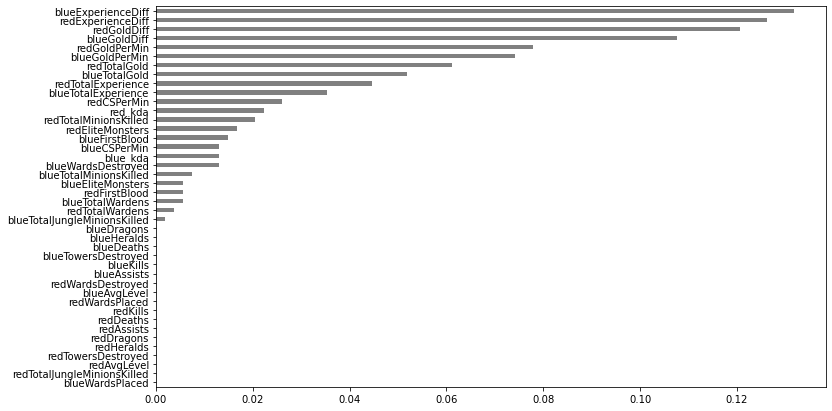

In [15]:
plt.figure(figsize=(12,7))
pd.Series(rf.feature_importances_,index=X.columns).sort_values().plot(kind="barh",color="gray")
plt.show()

In [16]:
important_features = ['red_kda',
 'blue_kda',
 #'blueGoldDiff',
 #'redGoldDiff',
 'blueExperienceDiff',
 'redExperienceDiff',
 'blueGoldPerMin',
 'blueTotalGold',
 'redGoldPerMin',
 'redTotalGold',
 'redTotalExperience',
 'blueTotalExperience',
 'blueAvgLevel',
 'redKills',
 'blueDeaths',
 'redAvgLevel',
 'blueKills',
 'redDeaths',
 'blueAssists',
 'redAssists',
 'blueEliteMonsters',
  #new                    
 'blueTotalWardens',
 'redTotalWardens', 
 #'redGoldExperience', 
 #'blueGoldExperience',
 #'redGolds',
 #'blueGolds'
                     
                     ]


In [17]:
X_train_best_features = X_train_scaled_df[important_features]
X_test_best_features = X_test_scaled_df[important_features]
print(X_train_best_features.shape,X_test_best_features.shape)
print(y_train.shape,y_test.shape)

(7903, 21) (1976, 21)
(7903,) (1976,)


In [ ]:
tree = DecisionTreeClassifier(max_depth =5, random_state = 42)
tree.fit(X_train_best_features, y_train)
y_pred_tree = tree.predict(X_test_best_features)
print(tree.score(X_train_best_features,y_train))
print(accuracy_score(y_test,y_pred_tree))

In [ ]:
param_grid = {'n_estimators': [50, 75, 100],
                'max_depth': [1, 3, 5, 7, 10],
                'min_samples_leaf': [1, 3, 5, 7]}

In [ ]:
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy')

In [ ]:
rf_gs.fit(X_train_scaled, y_train)

In [ ]:
best_model = rf_gs.best_estimator_

In [ ]:
best_model.fit(X_train_scaled, y_train)

   
train_preds = best_model.predict(X_train_scaled)
test_preds = best_model.predict(X_test_scaled)


print('Training accuracy: ', accuracy_score(y_train, train_preds))
print('Validation accuracy: ', accuracy_score(y_test, test_preds))

In [ ]:
plot_confusion_matrix(best_model, X_test_scaled, y_test)

max_depth , min_child_weight and gamma .

In [ ]:
clf = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 booster='gbtree',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

# Fit XGBClassifier
clf.fit(X_train_scaled, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train_scaled)
test_preds = clf.predict(X_test_scaled)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

In [ ]:
'''
boost_param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [3,6,10],
    'min_child_weight': [.5,2,5],
    'subsample': [0.5, 0.7, 0.9],
    'n_estimators': [100, 500, 1000],
    'gamma': [.1, .5, 1]
}
'''

In [ ]:
boost_param_grid = {
    'learning_rate': [0.2],
    'max_depth': [3,10],
    'min_child_weight': [.5,5],
    'subsample': [0.5, 0.9],
    'n_estimators': [100, 1000],
    'gamma': [.1, 1]
}

In [ ]:
grid_clf = GridSearchCV(clf, boost_param_grid, scoring='accuracy', cv=3, n_jobs=-1)
grid_clf.fit(X_train_best_features, y_train)

best_parameters = grid_clf.best_params_
print(best_parameters)
#print('Grid Search found the following optimal parameters: ')
#for param_name in sorted(best_parameters.keys()):
    #print('%s: %r' % (param_name, best_parameters[param_name]))



In [ ]:

training_preds = grid_clf.predict(X_train_best_features)
test_preds = grid_clf.predict(X_test_best_features)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

**SVM**

In [ ]:
print(y_train.shape)
print(y_test.shape)

In [ ]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='rbf', gamma=0.7, C=C),
         svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X_train, y_train) for clf in models)

In [ ]:
for model in models:
    train_preds = model.predict(X_train)
    print(train_preds.shape)
    test_preds = model.predict(X_test)
    print(test_preds.shape)
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('test accuracy: ', accuracy_score(y_test, test_preds))
    print()

In [ ]:
SVM = svm.SVC(kernel='poly', degree=3, gamma='auto', C=1)
SVM.fit(X_train_best_features, y_train)
train_preds = SVM.predict(X_train_best_features)
test_preds = SVM.predict(X_test_best_features)
print('Training accuracy: ', accuracy_score(y_train, train_preds))
print('test accuracy: ', accuracy_score(y_test, test_preds))

**Logistic Regression Probabilities**

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train_best_features, y_train)
preds = logreg.predict(X_test_best_features)
probs = logreg.predict_proba(X_train_best_features)
print(len(probs))
for label, prob in zip(X_test_best_features.columns, probs):
    print(label, prob)

7903
red_kda [0.81053171 0.18946829]
blue_kda [0.8012521 0.1987479]
blueExperienceDiff [0.4549885 0.5450115]
redExperienceDiff [0.62276869 0.37723131]
blueGoldPerMin [0.12825663 0.87174337]
blueTotalGold [0.31114352 0.68885648]
redGoldPerMin [0.1445325 0.8554675]
redTotalGold [0.42326942 0.57673058]
redTotalExperience [0.71961084 0.28038916]
blueTotalExperience [0.22184454 0.77815546]
blueAvgLevel [0.85308721 0.14691279]
redKills [0.69783223 0.30216777]
blueDeaths [0.23332043 0.76667957]
redAvgLevel [0.27801296 0.72198704]
blueKills [0.17532234 0.82467766]
redDeaths [0.24807393 0.75192607]
blueAssists [0.18651639 0.81348361]
redAssists [0.86966471 0.13033529]
blueEliteMonsters [0.16125094 0.83874906]
blueTotalWardens [0.73690543 0.26309457]
redTotalWardens [0.10275445 0.89724555]


# Second Part

In [ ]:
data = pd.read_csv('../../../high_diamond_ranked_10min.csv')
data.drop(columns=["gameId"], inplace=True)

data

In [ ]:
data.info()

In [ ]:
data.value_counts("blueWins")

In [ ]:
data["blue_KDA"] = round(((data["blueKills"] + data["blueAssists"]) / data["blueDeaths"]), 2)
data["red_KDA"] = round(((data["redKills"] + data["redAssists"]) / data["redDeaths"]), 2)

In [ ]:
data["blue_KDA"].sort_values()

In [ ]:
data.fillna(0)['blue_KDA'].sort_values()

In [ ]:
data['blue_KDA'][data['blue_KDA'] == np.inf] = 0 
data['red_KDA'][data['red_KDA'] == np.inf] = 0 

In [ ]:
data['blue_KDA'].sort_values()

In [ ]:
data["blue_KDA"] = data.fillna(0) 

data["red_KDA"] = round(((data["redKills"] + data["redAssists"]) / data["redDeaths"]), 2)
data["red_KDA"] = data.fillna(0)

In [ ]:
data["blue_KDA"] = round(((data["blueKills"] + data["blueAssists"]) / data["blueDeaths"]), 2)
#data["blue_KDA"] = data["blue_KDA"].fillna(0) 

data["red_KDA"] = round(((data["redKills"] + data["redAssists"]) / data["redDeaths"]), 2)
#data["red_KDA"] = data["red_KDA"].fillna(0)


In [ ]:
#data.loc[data['redDeaths'] ==0] = round(data["blueKills"] + data["blueAssists"])


#data['blue_KDA'] = data[['blueAssists','blueKills']].sum(axis=1).where(data['blueDeaths'] == np.inf, 0)

In [ ]:
for idx, x in enumerate(data['blue_KDA']):
    print(idx,x)
    print('type: ', type(x))
    print()
    if np.isinf(x):
        data['blue_KDA'][idx] = round(data["blueKills"][idx] + data["blueAssists"][idx])

In [ ]:
for idx, x in enumerate(data['red_KDA']):
    print(idx,x)

In [ ]:

for idx, x in enumerate(data['red_KDA']):
    print(idx,x)
    if np.isinf(x):
        data['red_KDA'][idx] = round(data["redKills"][idx] + data["redAssists"][idx])

    

In [ ]:
data.describe()

In [ ]:
data

In [ ]:
data.describe()

In [ ]:
#data.loc[data['red_KDA'] == np.inf]

In [ ]:
#data.loc[data['red_KDA'] == np.inf] = round(data["redKills"] + data["redAssists"])

In [ ]:
data.loc[:,['blueKills', 'blueAssists', 'blueDeaths']].head(9)

In [ ]:
#data.drop(72, inplace=True)

In [ ]:
data['blue_KDA'].value_counts().to_string()

In [ ]:
fig, ax = plt.subplots()
ax.bar(data['blue_KDA'].unique(),data['blue_KDA'].value_counts())

In [ ]:
data.describe()

In [ ]:
#3217

In [ ]:
pd.DataFrame(data["red_KDA"], columns=['red_KDA']).sample(n=15)

In [ ]:
y = data["blueWins"]

X = data.drop("blueWins",axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

rf = RandomForestClassifier(n_estimators=400,min_samples_leaf=0.12,random_state=42)
rf.fit(X_train,y_train)

In [ ]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values().plot(kind="barh",color="gray")
plt.show()

feature_importances = pd.DataFrame(rf.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)
most_important_features = list(feature_importances.index[:24])
most_important_features

In [ ]:
X_train = X_train[most_important_features]
X_test = X_test[most_important_features]
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,30)
scores = []
for k in k_range:
    knn =  KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred_knn))
print(scores)
plt.plot(k_range,scores,marker="o")
plt.ylabel("acurracy")
plt.xlabel("N#_neighbors")
plt.show()

knn =  KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_test,y_pred_knn))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(max_depth = 6, random_state = 42)
d_tree.fit(X_train, y_train)
y_pred_dtree = d_tree.predict(X_test)
print(d_tree.score(X_train, y_train))
print(accuracy_score(y_test, y_pred_dtree))


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_dtree))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dtree).ravel()
print("acurracy :", accuracy_score(y_test, y_pred_dtree)) #(tp+tn)/(tp+tn+fp+fn))
print("precision :",tp/(tp+fn))


In [ ]:
predictions = pd.DataFrame(y_pred_dtree,columns=["BlueWins"])
predictions

In [ ]:
ax = sns.catplot(x="BlueWins",data=predictions,palette=["r","b"],kind="count")
plt.ylabel("Total victories")
plt.xlabel("Red_Team = 0              Blue_Team = 1")
plt.title("Total Victories per Team")
plt.show()

predictions.value_counts("BlueWins")